In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [3]:
df = pd.read_excel("cleaned data.xlsx")

In [4]:
df.head()

,Treatment_1,Gender_1,Diff in BMI,Diff in Weight,Diff in UCS,Diff in ECS,Diff in RCS,Age_1,Race_1,Country_1,MedIncome_1
0,A,Male,3.049315,35.626737,8.732289,4.462381,5.063896,14.0,Caucasian,USA,33843.52
1,A,Male,2.242491,37.479454,7.270702,7.402028,5.800537,17.0,Asian,China,38348.72
2,A,Male,2.139960,36.772465,6.528457,6.197926,4.612538,14.0,Latin American,Brazil,30606.93
3,A,Male,1.821191,37.473124,5.683841,6.363154,4.862849,17.0,African,Cook Islands,5549.74
4,A,Male,1.611094,39.962172,8.300085,7.963958,3.638673,18.0,Asian,China,37925.09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Treatment_1     250 non-null    object 
 1   Gender_1        250 non-null    object 
 2   Diff in BMI     250 non-null    float64
 3   Diff in Weight  250 non-null    float64
 4   Diff in UCS     250 non-null    float64
 5   Diff in ECS     250 non-null    float64
 6   Diff in RCS     250 non-null    float64
 7   Age_1           250 non-null    float64
 8   Race_1          250 non-null    object 
 9   Country_1       250 non-null    object 
 10  MedIncome_1     250 non-null    float64
dtypes: float64(7), object(4)
memory usage: 21.6+ KB


In [6]:
# Convert categorical variables to appropriate data types
df["Treatment_1"] = df["Treatment_1"].astype("category")
df["Gender_1"] = df["Gender_1"].astype("category")
df["Race_1"] = df["Race_1"].astype("category")
df["Country_1"] = df["Country_1"].astype("category")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Treatment_1     250 non-null    category
 1   Gender_1        250 non-null    category
 2   Diff in BMI     250 non-null    float64 
 3   Diff in Weight  250 non-null    float64 
 4   Diff in UCS     250 non-null    float64 
 5   Diff in ECS     250 non-null    float64 
 6   Diff in RCS     250 non-null    float64 
 7   Age_1           250 non-null    float64 
 8   Race_1          250 non-null    category
 9   Country_1       250 non-null    category
 10  MedIncome_1     250 non-null    float64 
dtypes: category(4), float64(7)
memory usage: 15.4 KB


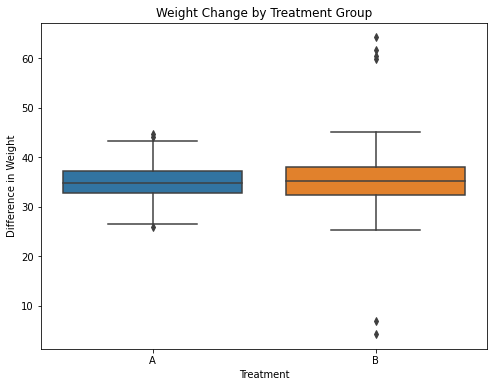

In [22]:
# Descriptive statistics
df.groupby("Treatment_1")["Diff in Weight"].describe()

# Box plot to visualize the distribution of weight change by treatment group
plt.figure(figsize=(8, 6))
sns.boxplot(x="Treatment_1", y="Diff in Weight", data=df)
plt.xlabel("Treatment")
plt.ylabel("Difference in Weight")
plt.title("Weight Change by Treatment Group")
plt.show()


In [28]:
# Calculate the IQR for Treatment A and Treatment B
Q1_A = df[df["Treatment_1"] == "A"]["Diff in Weight"].quantile(0.25)
Q3_A = df[df["Treatment_1"] == "A"]["Diff in Weight"].quantile(0.75)
IQR_A = Q3_A - Q1_A

Q1_B = df[df["Treatment_1"] == "B"]["Diff in Weight"].quantile(0.25)
Q3_B = df[df["Treatment_1"] == "B"]["Diff in Weight"].quantile(0.75)
IQR_B = Q3_B - Q1_B

# Define the upper and lower bounds for outliers
lower_bound_A = Q1_A - 1.5 * IQR_A
upper_bound_A = Q3_A + 1.5 * IQR_A

lower_bound_B = Q1_B - 1.5 * IQR_B
upper_bound_B = Q3_B + 1.5 * IQR_B

# Remove outliers for Treatment A and Treatment B
df = df.loc[~((df["Treatment_1"] == "A") & ((df["Diff in Weight"] < lower_bound_A) | (df["Diff in Weight"] > upper_bound_A)))]
df = df.loc[~((df["Treatment_1"] == "B") & ((df["Diff in Weight"] < lower_bound_B) | (df["Diff in Weight"] > upper_bound_B)))]


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 249
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Treatment_1     241 non-null    category
 1   Gender_1        241 non-null    category
 2   Diff in BMI     241 non-null    float64 
 3   Diff in Weight  241 non-null    float64 
 4   Diff in UCS     241 non-null    float64 
 5   Diff in ECS     241 non-null    float64 
 6   Diff in RCS     241 non-null    float64 
 7   Age_1           241 non-null    float64 
 8   Race_1          241 non-null    category
 9   Country_1       241 non-null    category
 10  MedIncome_1     241 non-null    float64 
dtypes: category(4), float64(7)
memory usage: 16.7 KB


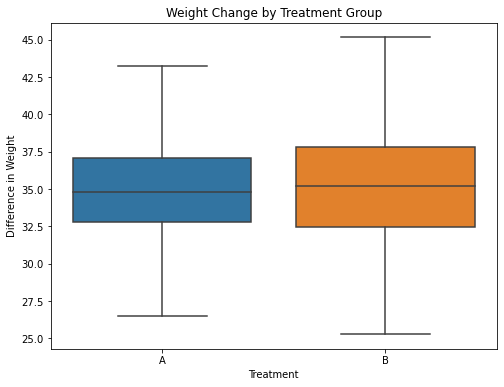

In [30]:
# Descriptive statistics
df.groupby("Treatment_1")["Diff in Weight"].describe()

# Box plot to visualize the distribution of weight change by treatment group
plt.figure(figsize=(8, 6))
sns.boxplot(x="Treatment_1", y="Diff in Weight", data=df)
plt.xlabel("Treatment")
plt.ylabel("Difference in Weight")
plt.title("Weight Change by Treatment Group")
plt.show()


## defining the hypothesis

 Null Hypothesis (H0): There is no significant difference in the mean body weight reduction between treatment A and treatment B.
        
 Alternative Hypothesis (H1): There is a significant difference in the mean body weight reduction between treatment A and treatment B.

<AxesSubplot:xlabel='Diff in BMI', ylabel='Count'>

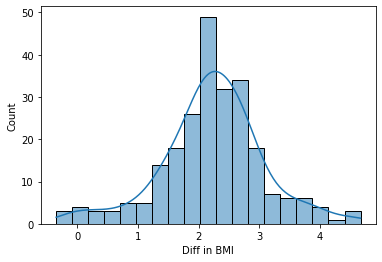

In [31]:
sns.histplot(df["Diff in BMI"], kde = True)  # checking if data is normal 

<AxesSubplot:xlabel='Diff in Weight', ylabel='Count'>

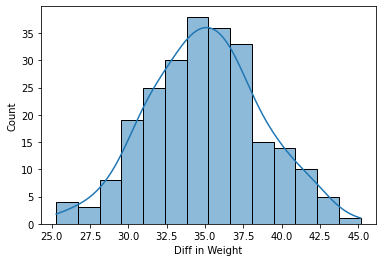

In [32]:
sns.histplot(df["Diff in Weight"], kde = True) # checking if data is normal 

In [34]:
# checking the assumption of homogeneity of variances
statistic, p_value = shapiro(df['Diff in Weight'])
print("Shapiro-Wilk test:")
print(f"Statistic: {statistic}, p-value: {p_value}")

# Levene's test for homogeneity of variances
group1 = df[df['Treatment_1'] == 'A']['Diff in Weight']
group2 = df[df['Treatment_1'] == 'B']['Diff in Weight']
statistic, p_value = levene(group1, group2)
print("Levene's test:")
print(f"Statistic: {statistic}, p-value: {p_value}")

Shapiro-Wilk test:
Statistic: 0.9972987174987793, p-value: 0.9583585262298584
Levene's test:
Statistic: 1.186791626953015, p-value: 0.2770748921876409


In [38]:
# Perform independent t-test
group_A = df[df["Treatment_1"] == "A"]["Diff in Weight"]
group_B = df[df["Treatment_1"] == "B"]["Diff in Weight"]
t_stat, p_value = stats.ttest_ind(group_A, group_B)

# Print the t-statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)



T-statistic: -1.049516931662707
P-value: 0.2950003619498086


Hypothesis testing results 

Based on the analysis conducted, there is no significant difference in mean weight change between Treatment A and Treatment B with the use of the drug TESTA. Therefore, based on this analysis alone, we cannot recommend one treatment over the other as being more effective in reducing weight. 

hence cannot reject the null hypothesis since p-value is greater than(0.05)


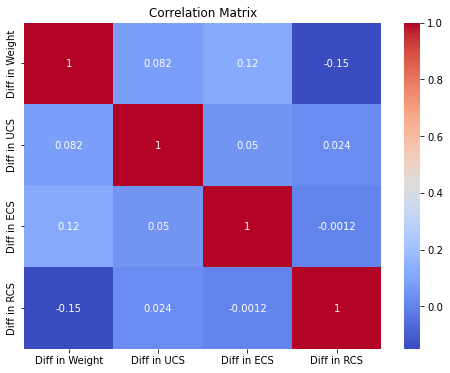

In [40]:
# Calculate correlations between variables
correlation_matrix = df[["Diff in Weight", "Diff in UCS", "Diff in ECS", "Diff in RCS"]].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


There is no strong correlation between any of the variables 

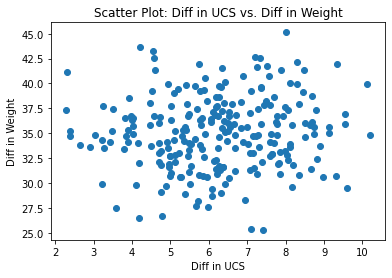

In [41]:
import matplotlib.pyplot as plt

plt.scatter(df["Diff in UCS"], df["Diff in Weight"])
plt.xlabel("Diff in UCS")
plt.ylabel("Diff in Weight")
plt.title("Scatter Plot: Diff in UCS vs. Diff in Weight")
plt.show()


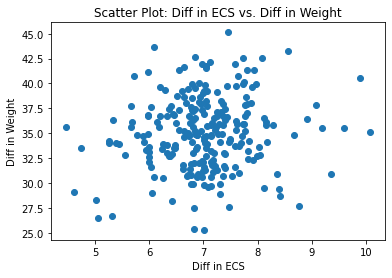

In [42]:
import matplotlib.pyplot as plt

plt.scatter(df["Diff in ECS"], df["Diff in Weight"])
plt.xlabel("Diff in ECS")
plt.ylabel("Diff in Weight")
plt.title("Scatter Plot: Diff in ECS vs. Diff in Weight")
plt.show()


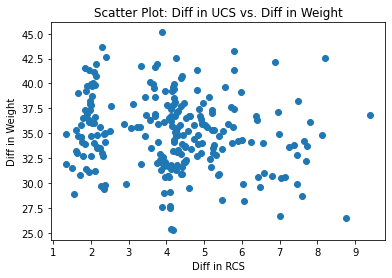

In [43]:
import matplotlib.pyplot as plt

plt.scatter(df["Diff in RCS"], df["Diff in Weight"])
plt.xlabel("Diff in RCS")
plt.ylabel("Diff in Weight")
plt.title("Scatter Plot: Diff in UCS vs. Diff in Weight")
plt.show()


Performing least squared to examined the relationship between eating behavior patterns (Diff in UCS, Diff in ECS, Diff in RCS) and weight change (Diff in Weight).

In [50]:
import statsmodels.api as sm

# Perform regression analysis
X = df[["Diff in UCS", "Diff in ECS", "Diff in RCS"]]
X = sm.add_constant(X)  # Add a constant term
y = df["Diff in Weight"]

model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         Diff in Weight   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.512
Date:                Mon, 10 Jul 2023   Prob (F-statistic):             0.0160
Time:                        14:10:57   Log-Likelihood:                -649.72
No. Observations:                 241   AIC:                             1307.
Df Residuals:                     237   BIC:                             1321.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          31.8336      2.164     14.714      

applied cluster analysis to data to identify distinct groups of individuals with similar eating behavior patterns. Cluster analysis can provide insights into subgroups that may respond differently to the treatments and help tailor personalized treatment approaches. 
applied k-means clustering to data



In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant variables for clustering
variables = ["Diff in UCS", "Diff in ECS", "Diff in RCS"]

# Standardize the variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables])

# Apply k-means clustering
k = 3  # Specify the number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df_scaled)

# Assign cluster labels to the data
df["Cluster"] = kmeans.labels_


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a DataFrame called 'df'
# Select relevant columns for clustering analysis
eating_behavior_data = df[['Diff in UCS', 'Diff in ECS', 'Diff in RCS']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(eating_behavior_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Specify the desired number of clusters
kmeans.fit(scaled_data)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_


In [52]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)


[[ 0.72210689  0.61792541  0.07869612]
 [-0.71891805 -0.15798728 -0.77929522]
 [-0.1982617  -0.86363611  1.04233004]]


In [53]:
cluster_weight_change = df.groupby("Cluster")["Diff in Weight"].mean()
print(cluster_weight_change)


Cluster
0    35.333176
1    35.399403
2    33.887742
Name: Diff in Weight, dtype: float64


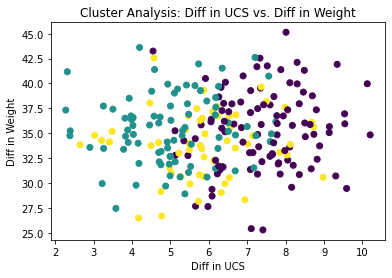

In [54]:
plt.scatter(df["Diff in UCS"], df["Diff in Weight"], c=df["Cluster"])
plt.xlabel("Diff in UCS")
plt.ylabel("Diff in Weight")
plt.title("Cluster Analysis: Diff in UCS vs. Diff in Weight")
plt.show()


Overall, the cluster analysis offers valuable insights into eating behavior patterns and their potential implications for treatment effectiveness. It emphasizes the need for personalized approaches to obesity management, taking into account individual differences in eating behaviors. By considering these findings, healthcare professionals can better tailor interventions and treatments to meet the specific needs of individuals with obesity.


Further Research: The cluster analysis provides a foundation for future research and exploration. Additional investigations can focus on understanding the underlying factors driving the eating behavior patterns, exploring potential interactions with other variables, and assessing the long-term impact of personalized treatment approaches on weight management and overall health.
